In [1]:
# Assignment 8 : Data Analytics - II
# Problem Statement

# Implement logistic regression using Python /R to perform classification on Social_Network_Ads.csv dataset.
# ComputeConfusionmatrixtofindTP,FP,TN,FN,Accuracy, Errorrate, Precision,Recall on the given dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score


In [3]:
data = pd.read_csv('social_network_ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [11]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
#Convert Gender to Binary (0-Male & 1-Female)
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


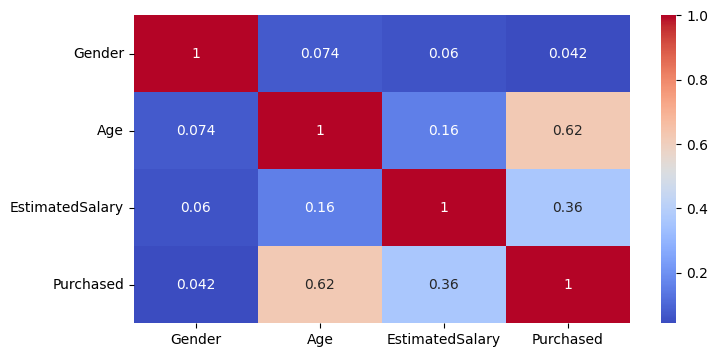

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(data[['Gender', 'Age', 'EstimatedSalary', 'Purchased']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [16]:
#Train the Logistic Regression Model

x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [18]:
#Result Evaluation 

#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[71  2]
 [15 32]]


In [20]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
print(f"TP = {tp}, FP = {fp}, TN = {tn}, FN = {fn}")

accuracy = accuracy_score(y_test, y_pred)
error_score = 1 - accuracy
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

TP = 32, FP = 2, TN = 71, FN = 15
Accuracy: 0.86
Error Rate: 0.14
Precision: 0.94
Recall: 0.68


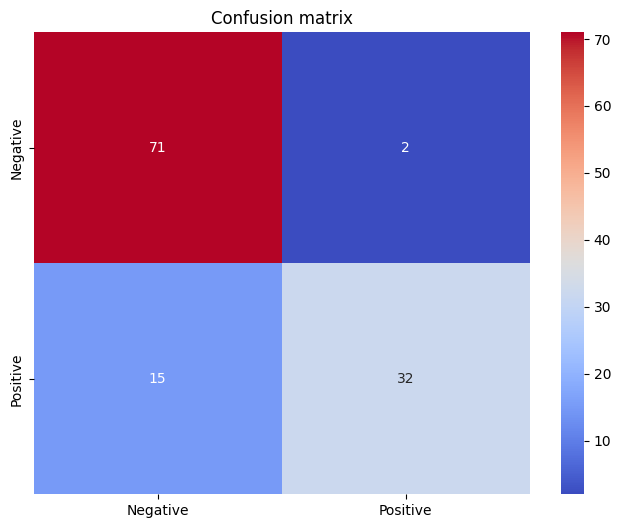

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap='coolwarm', annot=True)
plt.title("Confusion matrix")
plt.show()